#### 2-class classification
- 0: Trả nợ đúng hạn (Tốt)
- 1: Trả nợ không đúng hạn (Xấu)

### **1. Import libraries and data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import libraries
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import data
data = pd.read_excel("/content/drive/MyDrive/HỌC TẬP/NĂM 3/HK2/mô hình rủi ro tín dụng/ck/data_riskcredit.xlsx")

In [5]:
data.head(5)

,id,gioi tinh,thu nhap,tien dien/ thang,so tien vay,muc dich vay,gia dinh,so nam lam viec,tuoi,thoi gian vay,trinh do hoc van,tai san dam bao,kha nang tra no
0,1,2. Nam,17500000,420000,150000000,1. Vay tiêu dùng,1. Đã kết hôn,2,30,12,3. Cao đẳng,2. Có đủ TSĐB được bảo lãnh,0. Trả nợ đúng hạn
1,2,1. Nữ,27000000,690000,220000000,2. Vay xây nhà,1. Đã kết hôn,8,33,15,2. Đại học,1. Có đủ TSĐB của bản thân,0. Trả nợ đúng hạn
2,3,2. Nam,16000000,300000,180000000,3. Vay mua xe,2. Độc thân,4,25,13,4. Trung cấp,3. Có 1 phần TSĐB,1. Trả nợ trễ hạn
3,4,2. Nam,13000000,260000,50000000,5. Vay đầu tư chứng khoán,2. Độc thân,3,26,5,3. Cao đẳng,4. Không có TSĐB,1. Trả nợ trễ hạn
4,5,1. Nữ,16000000,350000,120000000,1. Vay tiêu dùng,3. Ly hôn,4,36,14,2. Đại học,1. Có đủ TSĐB của bản thân,0. Trả nợ đúng hạn


### **2. Checking the data**

In [6]:
#Searching for Missings,type of data and also known the shape of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3000 non-null   int64 
 1   gioi tinh         3000 non-null   object
 2   thu nhap          3000 non-null   int64 
 3   tien dien/ thang  3000 non-null   int64 
 4   so tien vay       3000 non-null   int64 
 5   muc dich vay      3000 non-null   object
 6   gia dinh          3000 non-null   object
 7   so nam lam viec   3000 non-null   int64 
 8   tuoi              3000 non-null   int64 
 9   thoi gian vay     3000 non-null   int64 
 10  trinh do hoc van  3000 non-null   object
 11  tai san dam bao   3000 non-null   object
 12  kha nang tra no   3000 non-null   object
dtypes: int64(7), object(6)
memory usage: 304.8+ KB


In [7]:
df = data.drop(['id'],axis = 1)

In [8]:
#Looking the data
df.head()

,gioi tinh,thu nhap,tien dien/ thang,so tien vay,muc dich vay,gia dinh,so nam lam viec,tuoi,thoi gian vay,trinh do hoc van,tai san dam bao,kha nang tra no
0,2. Nam,17500000,420000,150000000,1. Vay tiêu dùng,1. Đã kết hôn,2,30,12,3. Cao đẳng,2. Có đủ TSĐB được bảo lãnh,0. Trả nợ đúng hạn
1,1. Nữ,27000000,690000,220000000,2. Vay xây nhà,1. Đã kết hôn,8,33,15,2. Đại học,1. Có đủ TSĐB của bản thân,0. Trả nợ đúng hạn
2,2. Nam,16000000,300000,180000000,3. Vay mua xe,2. Độc thân,4,25,13,4. Trung cấp,3. Có 1 phần TSĐB,1. Trả nợ trễ hạn
3,2. Nam,13000000,260000,50000000,5. Vay đầu tư chứng khoán,2. Độc thân,3,26,5,3. Cao đẳng,4. Không có TSĐB,1. Trả nợ trễ hạn
4,1. Nữ,16000000,350000,120000000,1. Vay tiêu dùng,3. Ly hôn,4,36,14,2. Đại học,1. Có đủ TSĐB của bản thân,0. Trả nợ đúng hạn


In [9]:
print("Column          Null count")
for i in [df]:
    print(f"\n{i.isnull().sum().sort_values(ascending=False)}")

Column          Null count

gioi tinh           0
thu nhap            0
tien dien/ thang    0
so tien vay         0
muc dich vay        0
gia dinh            0
so nam lam viec     0
tuoi                0
thoi gian vay       0
trinh do hoc van    0
tai san dam bao     0
kha nang tra no     0
dtype: int64


In [10]:
# drop duplicates rows
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gioi tinh         1416 non-null   object
 1   thu nhap          1416 non-null   int64 
 2   tien dien/ thang  1416 non-null   int64 
 3   so tien vay       1416 non-null   int64 
 4   muc dich vay      1416 non-null   object
 5   gia dinh          1416 non-null   object
 6   so nam lam viec   1416 non-null   int64 
 7   tuoi              1416 non-null   int64 
 8   thoi gian vay     1416 non-null   int64 
 9   trinh do hoc van  1416 non-null   object
 10  tai san dam bao   1416 non-null   object
 11  kha nang tra no   1416 non-null   object
dtypes: int64(6), object(6)
memory usage: 143.8+ KB


In [12]:
#Looking unique values
print("Column            Unique")
print(df.nunique())

Column            Unique
gioi tinh             2
thu nhap            101
tien dien/ thang    201
so tien vay         104
muc dich vay          5
gia dinh              4
so nam lam viec      28
tuoi                 35
thoi gian vay        24
trinh do hoc van      5
tai san dam bao       4
kha nang tra no       2
dtype: int64


#### Descriptive Statistics

In [13]:
from copy import deepcopy
data_2 = deepcopy(df) 

In [14]:
numerical_features = ['thu nhap', 'tien dien/ thang', 'so tien vay', 
                      'so nam lam viec', 'tuoi', 'thoi gian vay']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  6


In [15]:
categorical_features = [x for x in df.columns if (x not in numerical_features 
                        and x != 'kha nang tra no')]
print('Number of categorical features: ', len(categorical_features))

Number of categorical features:  5


In [16]:
data_2[numerical_features].describe()

,thu nhap,tien dien/ thang,so tien vay,so nam lam viec,tuoi,thoi gian vay
count,1.416000e+03,1.416000e+03,1.416000e+03,1416.000000,1416.000000,1416.000000
mean,2.219011e+07,5.934781e+05,1.416211e+08,7.028955,34.949859,12.729520
std,7.538396e+06,2.331659e+05,9.209458e+07,4.376440,7.606369,5.159876
min,1.000000e+07,1.700000e+05,1.450000e+07,1.000000,19.000000,3.000000
25%,1.600000e+07,4.000000e+05,7.000000e+07,4.000000,29.000000,9.000000
50%,2.000000e+07,6.000000e+05,1.250000e+08,6.000000,35.000000,12.000000
75%,2.800000e+07,8.000000e+05,2.000000e+08,9.000000,39.000000,18.000000
max,4.200000e+07,4.335000e+06,4.980000e+08,32.000000,53.000000,26.000000


In [17]:
data_2[categorical_features].describe()

,gioi tinh,muc dich vay,gia dinh,trinh do hoc van,tai san dam bao
count,1416,1416,1416,1416,1416
unique,2,5,4,5,4
top,2. Nam,1. Vay tiêu dùng,1. Đã kết hôn,2. Đại học,1. Có đủ TSĐB của bản thân
freq,747,393,787,633,718


## **3. Data visualization**

In [18]:
for col in categorical_features:
    print(df[col].value_counts(), "\n\n")

2. Nam    747
1. Nữ     669
Name: gioi tinh, dtype: int64 


1. Vay tiêu dùng             393
3. Vay mua xe                391
2. Vay xây nhà               280
5. Vay đầu tư chứng khoán    214
4. Vay học tập               138
Name: muc dich vay, dtype: int64 


1. Đã kết hôn    787
2. Độc thân      346
3. Ly hôn        221
4. Góa            62
Name: gia dinh, dtype: int64 


2. Đại học        633
3. Cao đẳng       449
1. Sau đại học    163
4. Trung cấp      104
5. THPT            67
Name: trinh do hoc van, dtype: int64 


1. Có đủ TSĐB của bản thân     718
3. Có 1 phần TSĐB              359
2. Có đủ TSĐB được bảo lãnh    229
4. Không có TSĐB               110
Name: tai san dam bao, dtype: int64 




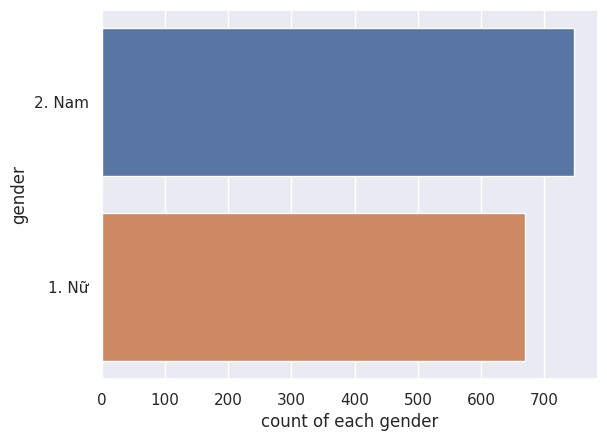

In [19]:
sns.countplot(y=df['gioi tinh'] ,data=df)
plt.xlabel("count of each gender")
plt.ylabel("gender")
plt.show()

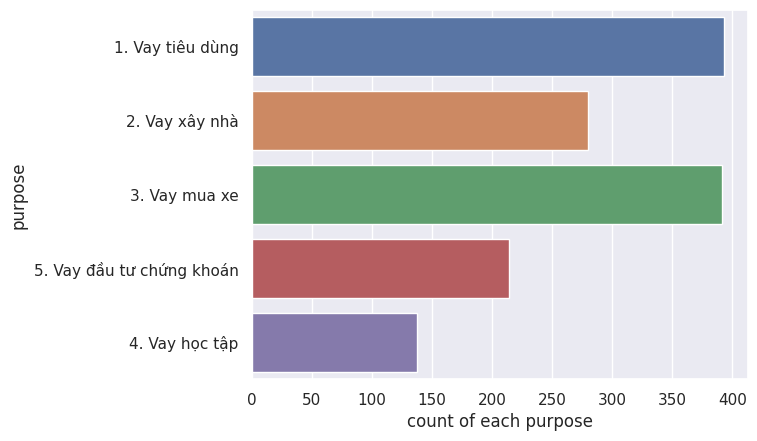

In [20]:
sns.countplot(y=df['muc dich vay'] ,data=df)
plt.xlabel("count of each purpose")
plt.ylabel("purpose")
plt.show()

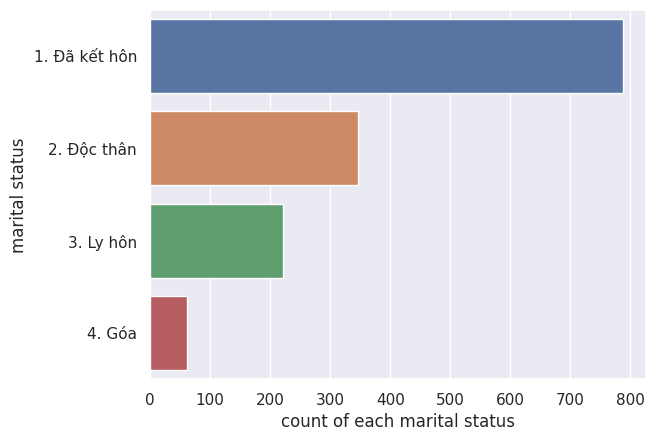

In [21]:
sns.countplot(y=df['gia dinh'] ,data=df)
plt.xlabel("count of each marital status")
plt.ylabel("marital status")
plt.show()

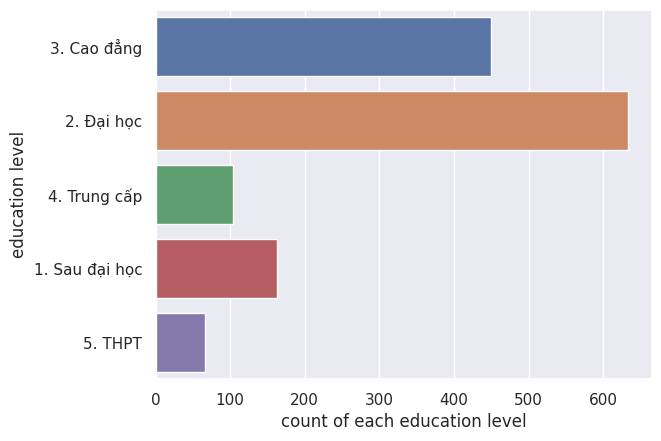

In [22]:
sns.countplot(y=df['trinh do hoc van'] ,data=df)
plt.xlabel("count of each education level")
plt.ylabel("education level")
plt.show()

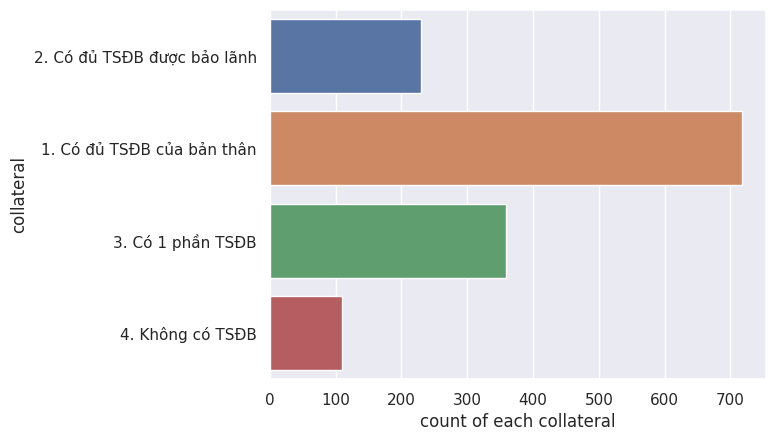

In [23]:
sns.countplot(y=df['tai san dam bao'] ,data=df)
plt.xlabel("count of each collateral")
plt.ylabel("collateral")
plt.show()

array([[<Axes: title={'center': 'thu nhap'}>,
        <Axes: title={'center': 'tien dien/ thang'}>],
       [<Axes: title={'center': 'so tien vay'}>,
        <Axes: title={'center': 'so nam lam viec'}>],
       [<Axes: title={'center': 'tuoi'}>,
        <Axes: title={'center': 'thoi gian vay'}>]], dtype=object)

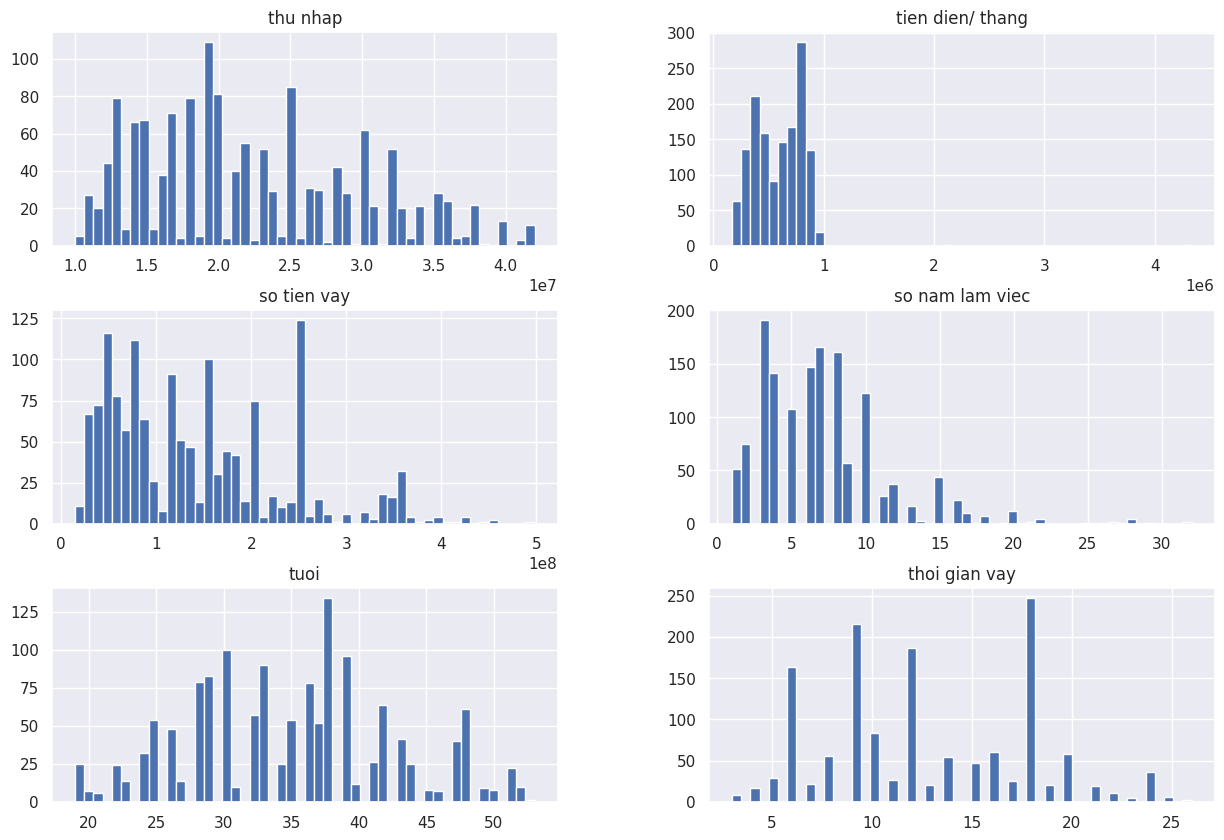

In [24]:
data_2[numerical_features].hist(bins=50, figsize=(15, 10))

In [25]:
#Converting categorical feature to numeric
df = df.replace({"gioi tinh":{"1. Nữ":1,
                           "2. Nam":2},
                "muc dich vay":{"1. Vay tiêu dùng":1,
                           "2. Vay xây nhà":2,
                           "3. Vay mua xe":3,
                           "4. Vay học tập":4,
                           "5. Vay đầu tư chứng khoán":5},
                "gia dinh":{"1. Đã kết hôn":1,
                            "2. Độc thân":2,
                            "3. Ly hôn":3,
                            "4. Góa":4},
                "trinh do hoc van":{"1. Sau đại học":1,
                            "2. Đại học":2,
                            "3. Cao đẳng":3,
                            "4. Trung cấp":4,
                            "5. THPT":5},
               "tai san dam bao":{"1. Có đủ TSĐB của bản thân":1,
                     "2. Có đủ TSĐB được bảo lãnh":2,
                     "3. Có 1 phần TSĐB":3,
                     "4. Không có TSĐB":4},
                "kha nang tra no":{"0. Trả nợ đúng hạn":0,
                           "1. Trả nợ trễ hạn":1}
                })

In [26]:
df.head()

,gioi tinh,thu nhap,tien dien/ thang,so tien vay,muc dich vay,gia dinh,so nam lam viec,tuoi,thoi gian vay,trinh do hoc van,tai san dam bao,kha nang tra no
0,2,17500000,420000,150000000,1,1,2,30,12,3,2,0
1,1,27000000,690000,220000000,2,1,8,33,15,2,1,0
2,2,16000000,300000,180000000,3,2,4,25,13,4,3,1
3,2,13000000,260000,50000000,5,2,3,26,5,3,4,1
4,1,16000000,350000,120000000,1,3,4,36,14,2,1,0


In [27]:
df["kha nang tra no"].value_counts()

0    961
1    455
Name: kha nang tra no, dtype: int64

In [28]:
print('Pay on time: ', round(df["kha nang tra no"].value_counts()[0]/len(df) * 100,2), '% of data set')
print('Pay late: ', round(df["kha nang tra no"].value_counts()[1]/len(df) * 100,2), '% of data set')

Pay on time:  67.87 % of data set
Pay late:  32.13 % of data set


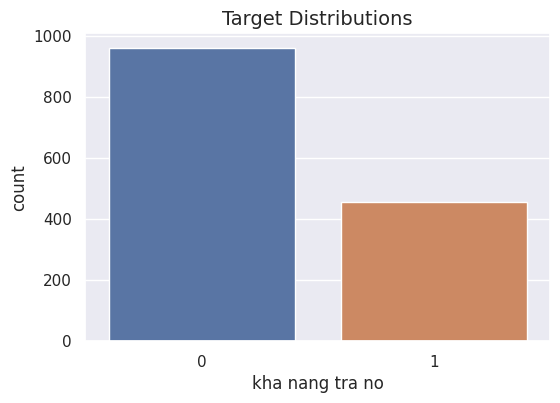

In [29]:
plt.figure(figsize = (6,4))
sns.countplot(x=df["kha nang tra no"])
plt.title("Target Distributions", fontsize=14)
plt.show()

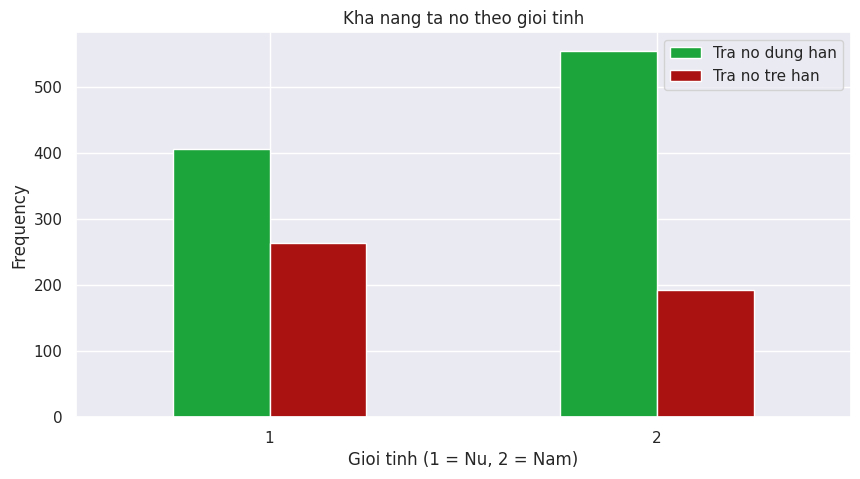

In [30]:
pd.crosstab(df['gioi tinh'],df['kha nang tra no']).plot(kind="bar",
                                              figsize=(10,5),
                                              color=['#1CA53B','#AA1111' ])
plt.title('Kha nang ta no theo gioi tinh')
plt.xlabel('Gioi tinh (1 = Nu, 2 = Nam)')
plt.xticks(rotation=0)
plt.legend(["Tra no dung han", "Tra no tre han"])
plt.ylabel('Frequency')
plt.show()

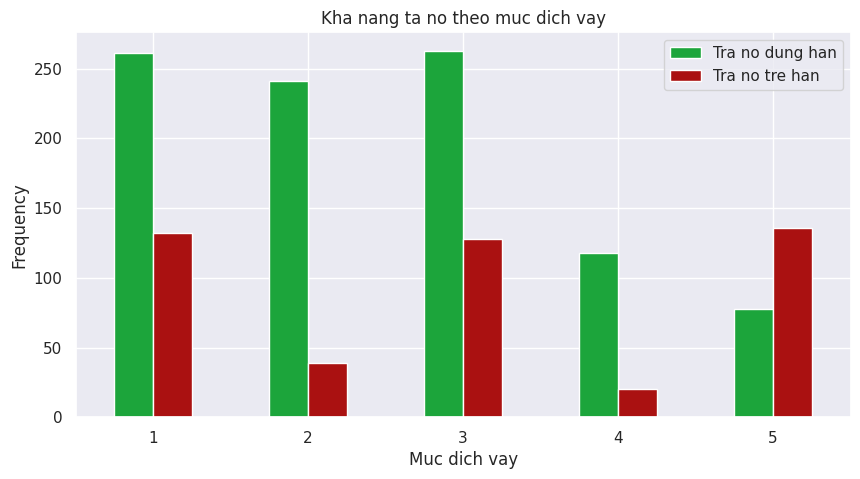

In [31]:
pd.crosstab(df['muc dich vay'],df['kha nang tra no']).plot(kind="bar",
                                              figsize=(10,5),
                                              color=['#1CA53B','#AA1111' ])
plt.title('Kha nang ta no theo muc dich vay')
plt.xlabel('Muc dich vay')
plt.xticks(rotation=0)
plt.legend(["Tra no dung han", "Tra no tre han"])
plt.ylabel('Frequency')
plt.show()

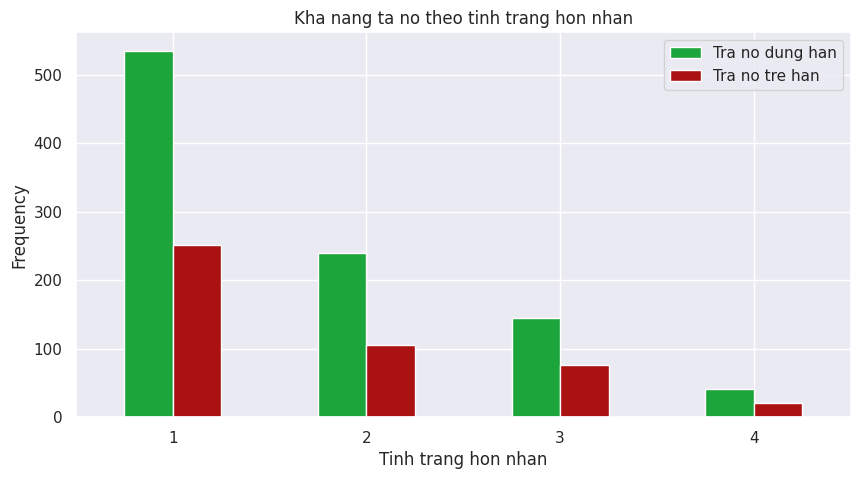

In [32]:
pd.crosstab(df['gia dinh'],df['kha nang tra no']).plot(kind="bar",
                                              figsize=(10,5),
                                              color=['#1CA53B','#AA1111' ])
plt.title('Kha nang ta no theo tinh trang hon nhan')
plt.xlabel('Tinh trang hon nhan')
plt.xticks(rotation=0)
plt.legend(["Tra no dung han", "Tra no tre han"])
plt.ylabel('Frequency')
plt.show()

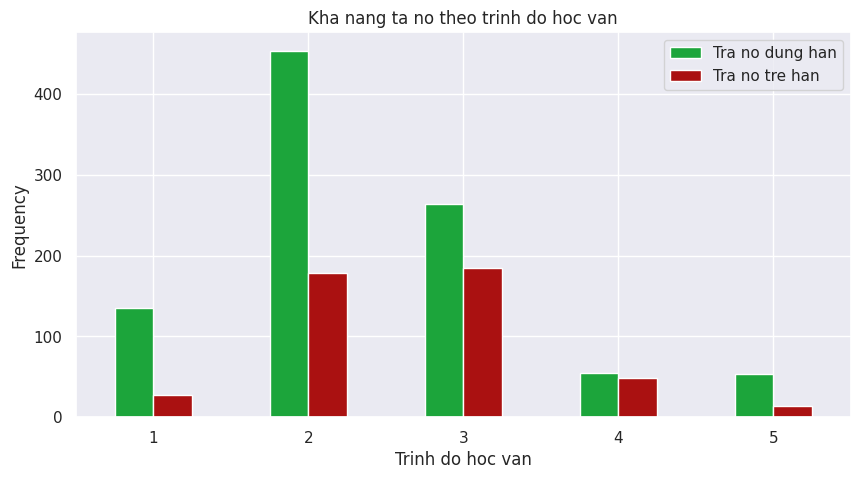

In [33]:
pd.crosstab(df['trinh do hoc van'],df['kha nang tra no']).plot(kind="bar",
                                              figsize=(10,5),
                                              color=['#1CA53B','#AA1111' ])
plt.title('Kha nang ta no theo trinh do hoc van')
plt.xlabel('Trinh do hoc van')
plt.xticks(rotation=0)
plt.legend(["Tra no dung han", "Tra no tre han"])
plt.ylabel('Frequency')
plt.show()

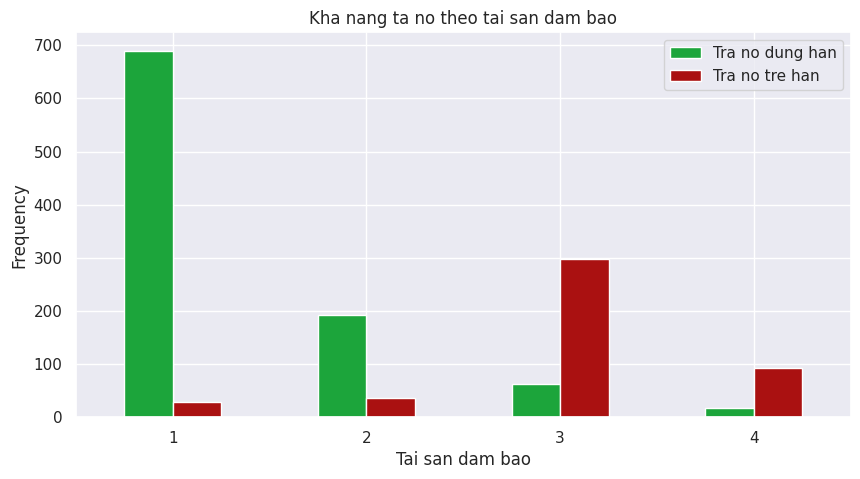

In [34]:
pd.crosstab(df['tai san dam bao'],df['kha nang tra no']).plot(kind="bar",
                                              figsize=(10,5),
                                              color=['#1CA53B','#AA1111' ])
plt.title('Kha nang ta no theo tai san dam bao')
plt.xlabel('Tai san dam bao')
plt.xticks(rotation=0)
plt.legend(["Tra no dung han", "Tra no tre han"])
plt.ylabel('Frequency')
plt.show()

#### Correlation

In [35]:
corr = pd.DataFrame(df.corr().iloc[:11,-1])
corr

,kha nang tra no
gioi tinh,-0.145496
thu nhap,-0.412300
tien dien/ thang,-0.136962
so tien vay,-0.147407
muc dich vay,0.164843
gia dinh,0.013661
so nam lam viec,-0.112058
tuoi,-0.036632
thoi gian vay,-0.261211
trinh do hoc van,0.116741


In [36]:
df.corr()

,gioi tinh,thu nhap,tien dien/ thang,so tien vay,muc dich vay,gia dinh,so nam lam viec,tuoi,thoi gian vay,trinh do hoc van,tai san dam bao,kha nang tra no
gioi tinh,1.000000,0.008847,-0.084930,-0.056306,0.070852,0.294789,-0.151850,-0.237858,-0.094876,0.123547,-0.011905,-0.145496
thu nhap,0.008847,1.000000,0.348629,0.505928,-0.233796,-0.045042,0.421257,0.373905,0.408523,-0.309341,-0.453989,-0.412300
tien dien/ thang,-0.084930,0.348629,1.000000,0.376559,-0.064244,-0.177350,0.395203,0.406221,0.343596,-0.368404,-0.347058,-0.136962
so tien vay,-0.056306,0.505928,0.376559,1.000000,-0.332361,-0.225286,0.460894,0.335239,0.773305,-0.364146,-0.392409,-0.147407
muc dich vay,0.070852,-0.233796,-0.064244,-0.332361,1.000000,0.076365,-0.195107,-0.189613,-0.346842,0.221173,0.208617,0.164843
gia dinh,0.294789,-0.045042,-0.177350,-0.225286,0.076365,1.000000,-0.024198,0.001133,-0.168498,0.043253,0.174793,0.013661
so nam lam viec,-0.151850,0.421257,0.395203,0.460894,-0.195107,-0.024198,1.000000,0.715954,0.390228,-0.310547,-0.309408,-0.112058
tuoi,-0.237858,0.373905,0.406221,0.335239,-0.189613,0.001133,0.715954,1.000000,0.322185,-0.259840,-0.251486,-0.036632
thoi gian vay,-0.094876,0.408523,0.343596,0.773305,-0.346842,-0.168498,0.390228,0.322185,1.000000,-0.415440,-0.464354,-0.261211
trinh do hoc van,0.123547,-0.309341,-0.368404,-0.364146,0.221173,0.043253,-0.310547,-0.259840,-0.415440,1.000000,0.287407,0.116741


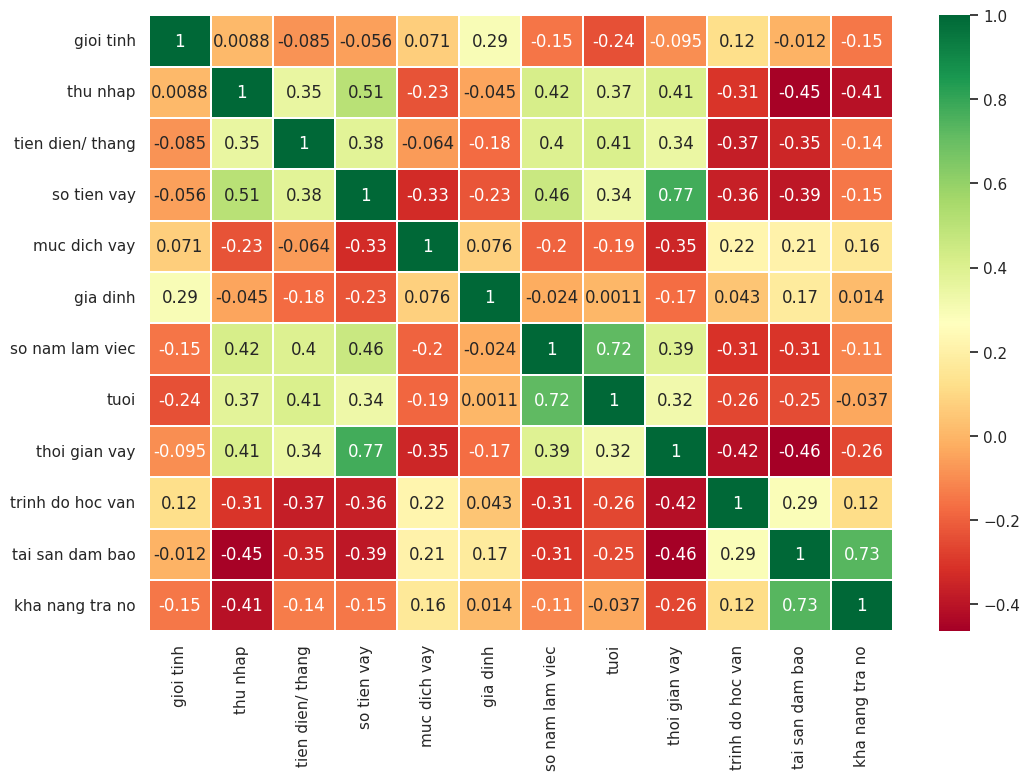

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

## **4. Pre-processing**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score

In [39]:
#ROC
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', 
             label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

Setting X and y variables to the prediction

In [40]:
target = ['kha nang tra no']
#features = ['gioi tinh', 'thu nhap','tien dien/ thang', 'so tien vay',
            #'muc dich vay', 'gia dinh', 'so nam lam viec','tuoi',
            #'thoi gian vay', 'trinh do hoc van', 'tai san dam bao']
features = ['tai san dam bao', 'so tien vay', 'thu nhap', 'muc dich vay',
       'thoi gian vay']

In [41]:
print('Target: ', target)
print('Features: ', features)

Target:  ['kha nang tra no']
Features:  ['tai san dam bao', 'so tien vay', 'thu nhap', 'muc dich vay', 'thoi gian vay']


In [42]:
X = df[features].values
y = df[target].values

In [43]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=n_state)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **5. Building the Models**

#### **Logistic regression**

In [45]:
from sklearn.linear_model import LogisticRegression

***a. Prediction***

Text(0.5, 19.049999999999997, 'Predicted label')

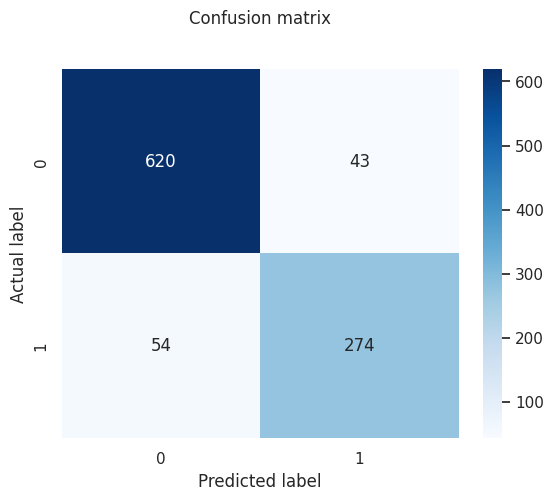

In [46]:
# Define model
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)

# Fit model
LR_classifier.fit(X_train, y_train.ravel())

# get predicted y on train data
y_pred = LR_classifier.predict(X_train)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print('Classification report:')
print(classification_report(y_train,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_train, y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       663
           1       0.86      0.84      0.85       328

    accuracy                           0.90       991
   macro avg       0.89      0.89      0.89       991
weighted avg       0.90      0.90      0.90       991

Logistic Regression accuracy:  0.9021


Text(0.5, 19.049999999999997, 'Predicted label')

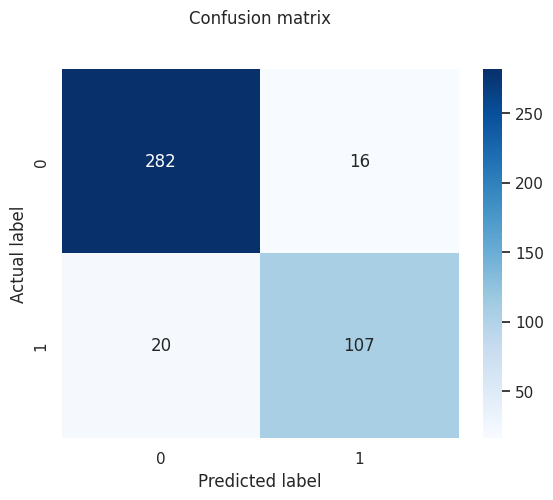

In [48]:
# get predicted y on test data
LR_y_pred = LR_classifier.predict(X_test)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,LR_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print('Classification report:')
print(classification_report(y_test,LR_y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, LR_y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       298
           1       0.87      0.84      0.86       127

    accuracy                           0.92       425
   macro avg       0.90      0.89      0.90       425
weighted avg       0.91      0.92      0.91       425

Logistic Regression accuracy:  0.9153


In [50]:
df_report = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':LR_y_pred.ravel()})
df_report

,Ground Truth,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
420,1,1
421,0,0
422,1,0
423,1,1


In [51]:
import statsmodels.api as SM

model_1 = SM.Logit(y_train, X_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.366097
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  991
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.4234
Time:                        20:26:20   Log-Likelihood:                -362.80
converged:                       True   LL-Null:                       -629.16
Covariance Type:            nonrobust   LLR p-value:                5.637e-114
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3248      0.148     15.716      0.000       2.035       2.615
x2             1.0545      0.

***b. Feature Importance***

In [52]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 
    'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
0,tai san dam bao,1.254513
1,so tien vay,0.592693
2,thu nhap,-0.340983
3,muc dich vay,0.135648
4,thoi gian vay,-0.062146


<Axes: ylabel='FeatureName'>

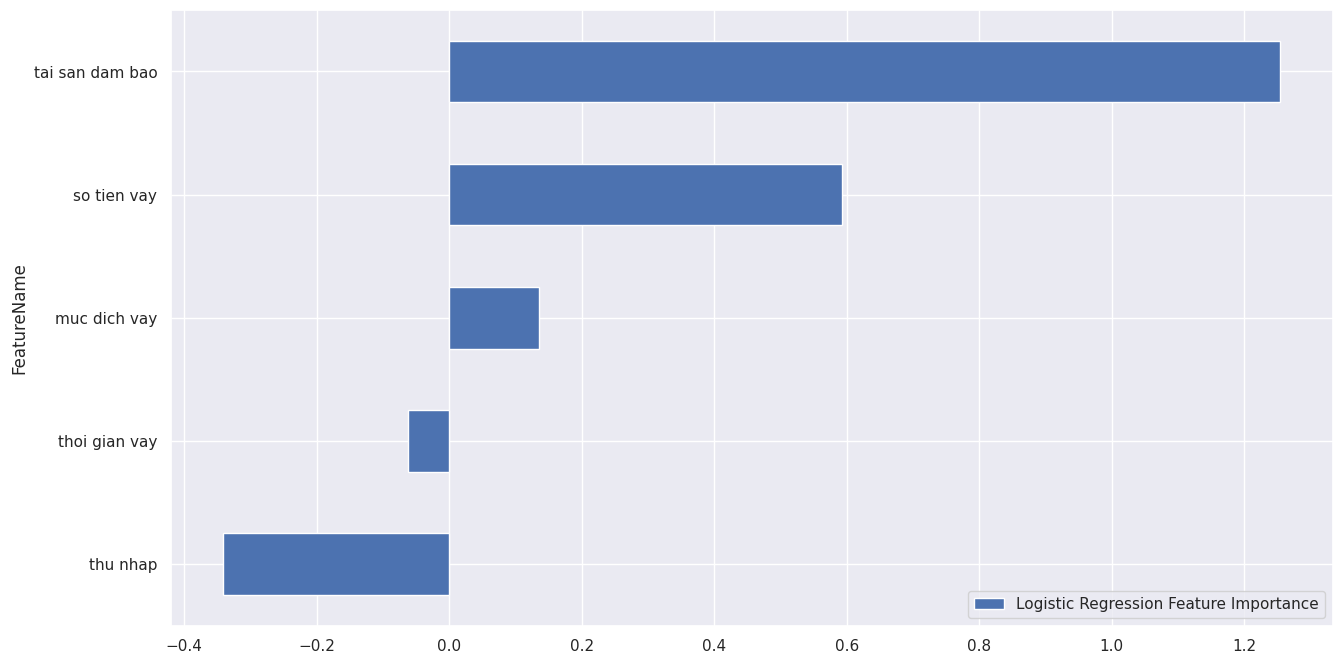

In [53]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

***c. ROC Curve***

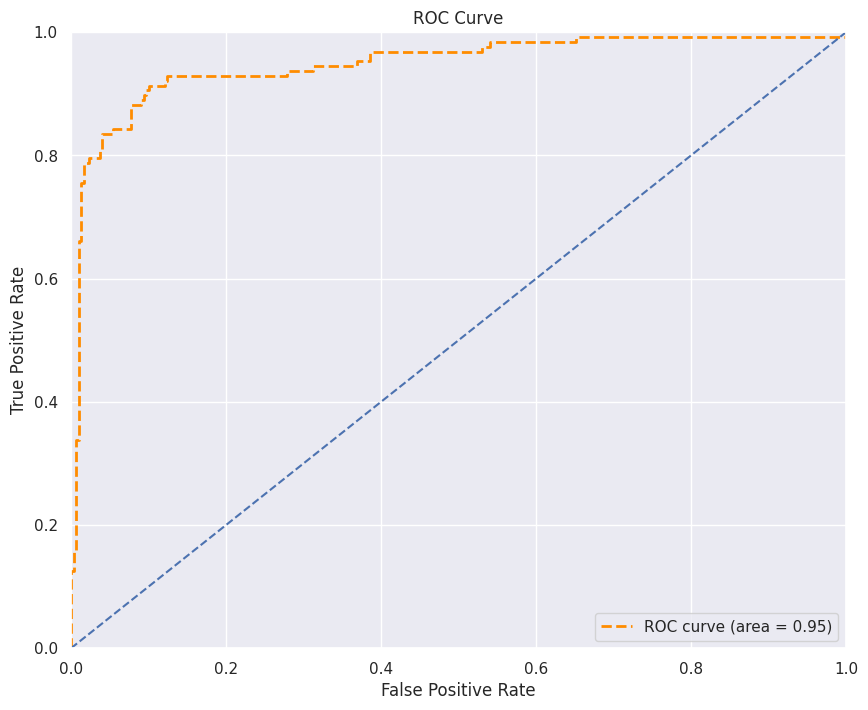

In [54]:
# ROC
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
LR_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, LR_roc_auc)

#### **Decision Tree**



In [55]:
from sklearn.tree import DecisionTreeClassifier

***a. Prediction***

Text(0.5, 19.049999999999997, 'Predicted label')

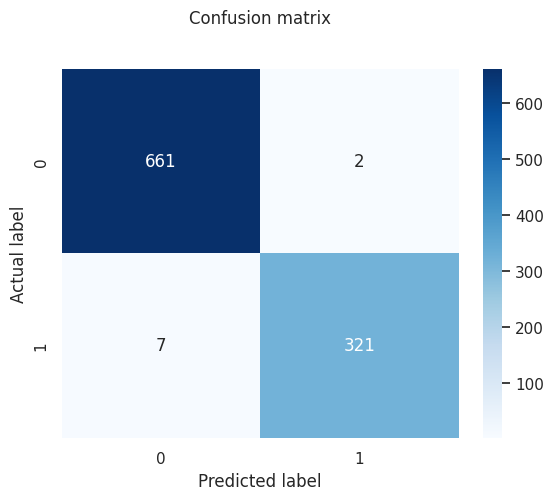

In [56]:
# Define model
DT_classifier = DecisionTreeClassifier()
# Fit model
DT_classifier.fit(X_train, y_train.ravel())
# get predicted y on train data
y_pred = DT_classifier.predict(X_train)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
print('Classification report:')
print(classification_report(y_train,y_pred))
print('Decision Tree accuracy: ', round(accuracy_score(y_train, y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       663
           1       0.99      0.98      0.99       328

    accuracy                           0.99       991
   macro avg       0.99      0.99      0.99       991
weighted avg       0.99      0.99      0.99       991

Decision Tree accuracy:  0.9909


Text(0.5, 19.049999999999997, 'Predicted label')

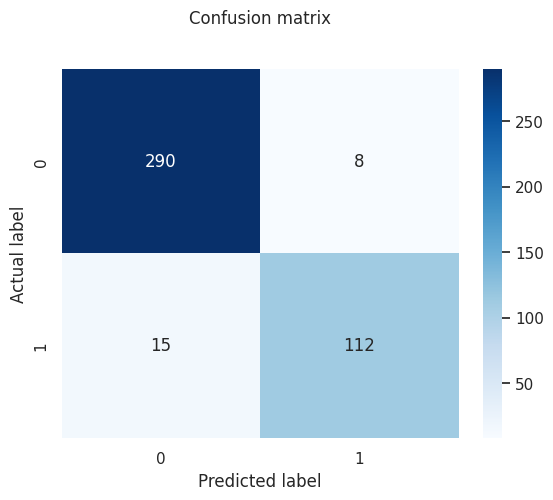

In [58]:
# get predicted y on test data
DT_y_pred = DT_classifier.predict(X_test)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,DT_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
print('Classification report:')
print(classification_report(y_test,DT_y_pred))
print('Decision Tree accuracy: ', round(accuracy_score(y_test, DT_y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       298
           1       0.93      0.88      0.91       127

    accuracy                           0.95       425
   macro avg       0.94      0.93      0.93       425
weighted avg       0.95      0.95      0.95       425

Decision Tree accuracy:  0.9459


***b. Feature Importance***

In [60]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({
    'FeatureName': df.loc[:,features].columns, 
    'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], 
                                    ascending=False)

,FeatureName,Decision Tree Feature Importance
0,tai san dam bao,0.621226
1,so tien vay,0.179790
2,thu nhap,0.088946
3,muc dich vay,0.076803
4,thoi gian vay,0.033235


<Axes: ylabel='FeatureName'>

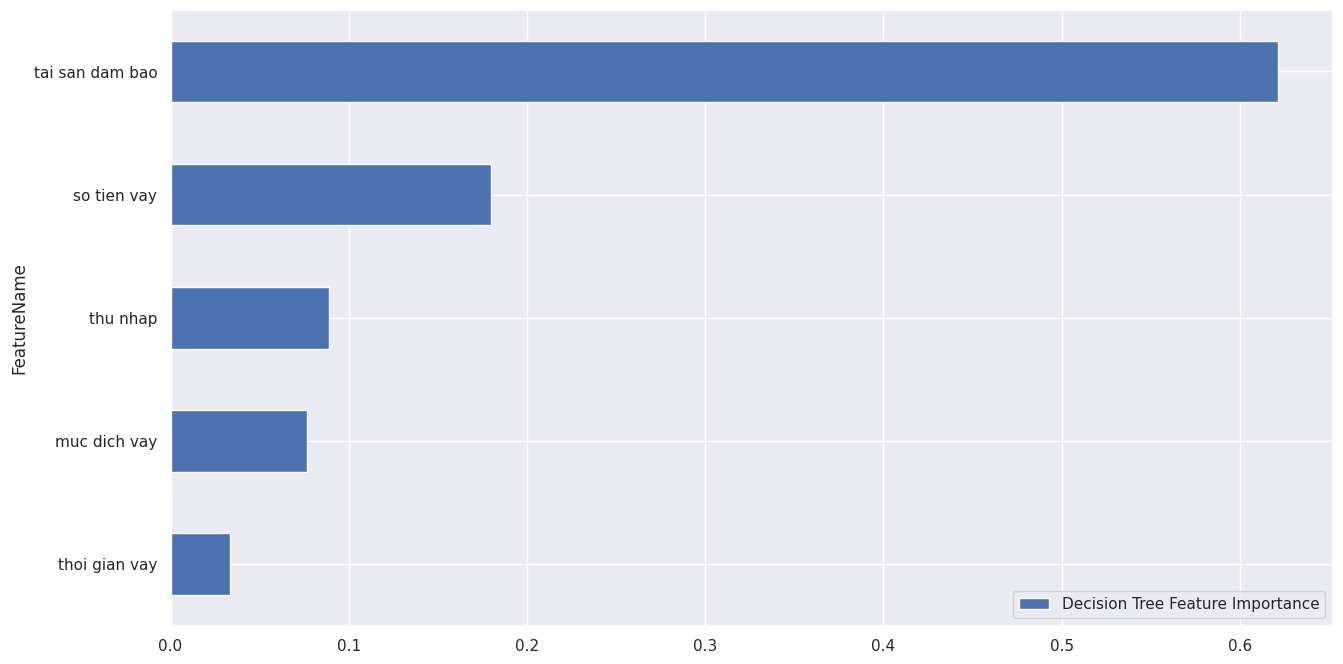

In [61]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), 
                                                                             x="FeatureName",
                                                                             y=["Decision Tree Feature Importance"], 
                                                                             kind="barh")

***c. ROC Curve***

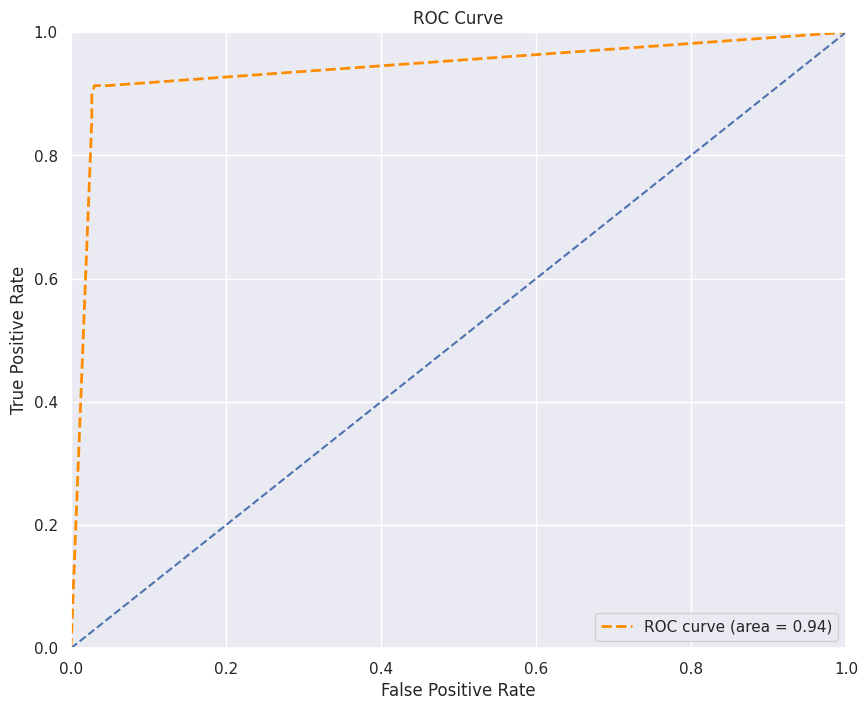

In [62]:
y_pred_prob_test_dt = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test_dt)
DT_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, DT_roc_auc)

**d. Plot tree**

In [63]:
X_plot_tree = df[features]

Note:Class 0 is on-time and class 1 is late payment


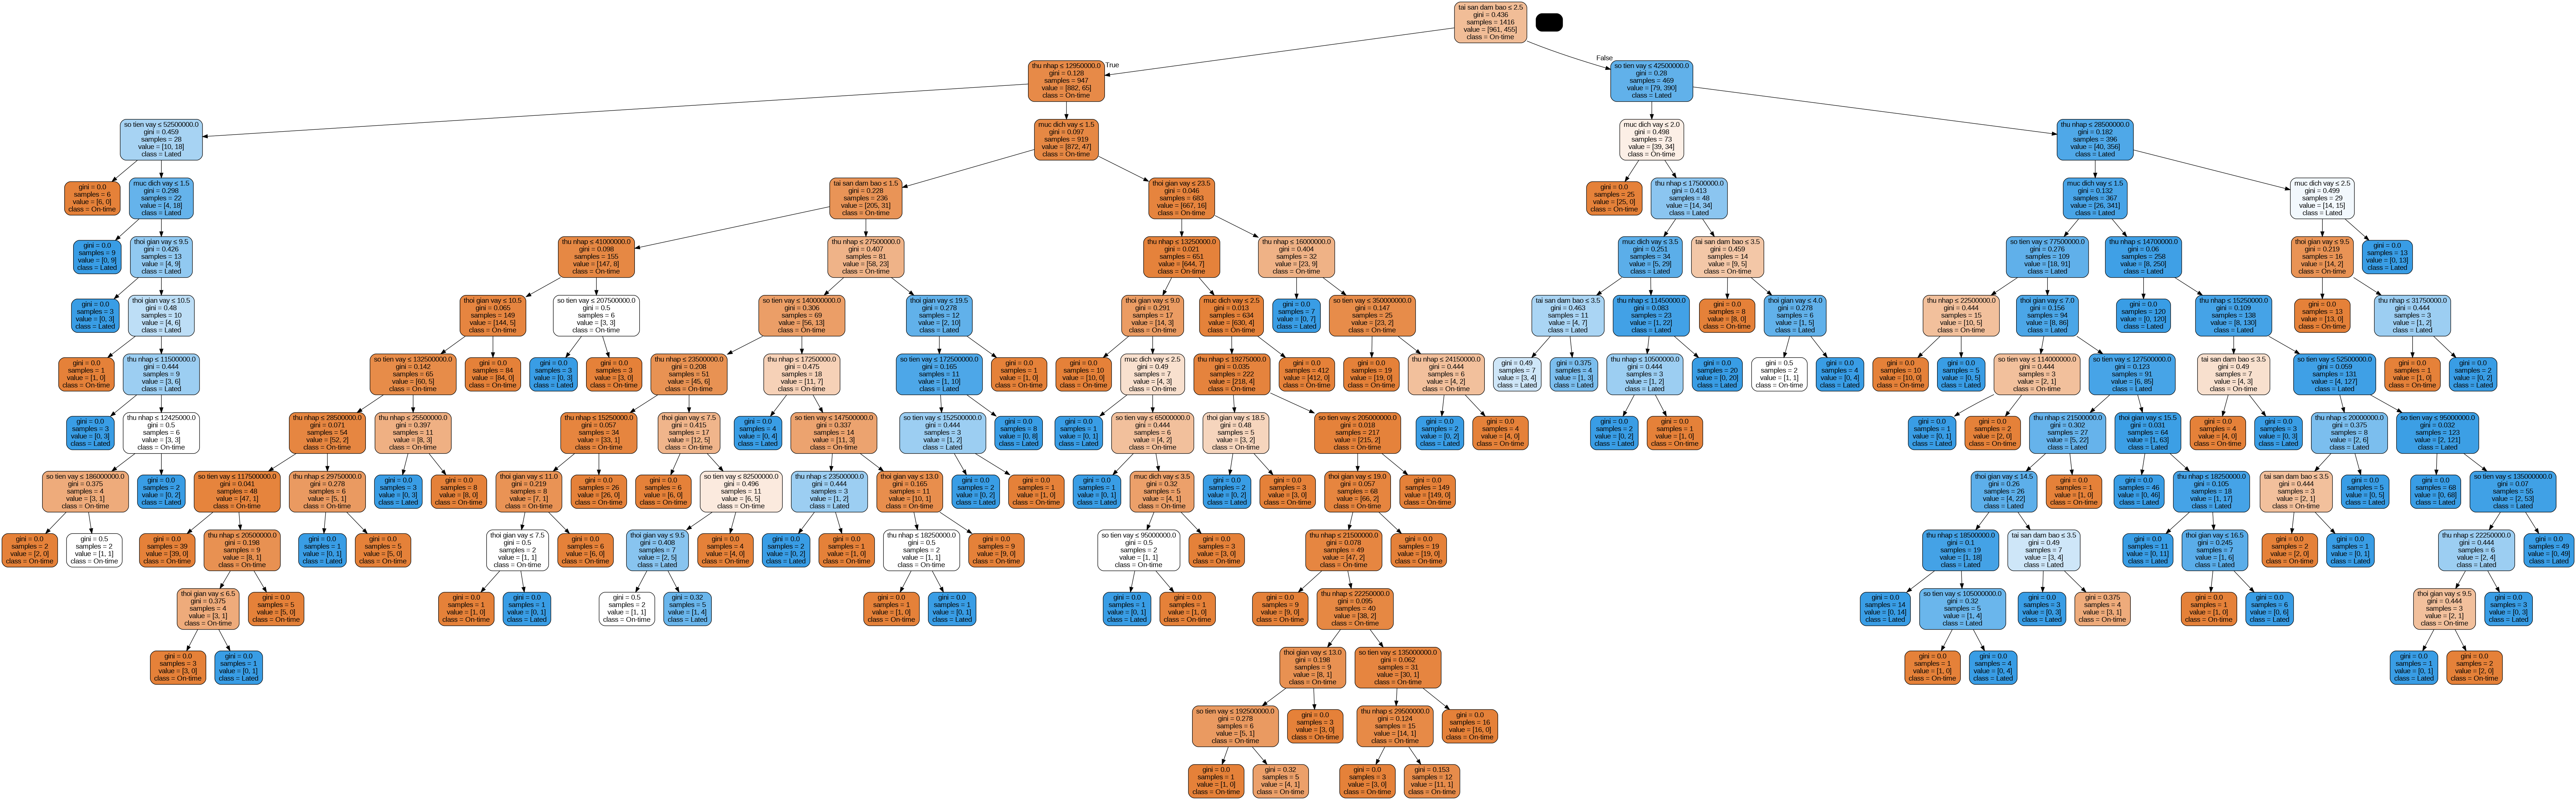

In [64]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
clf = DecisionTreeClassifier()#(max_depth=5, min_samples_leaf=100) #max_depth=5 , min_samples_leaf=200
clf.fit(X_plot_tree.values, y.ravel())
print('Note:Class 0 is on-time and class 1 is late payment')
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=features,
                class_names=['On-time','Lated'], 
                filled=True,
                rounded=True, 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Note:Class 0 is on-time and class 1 is late payment


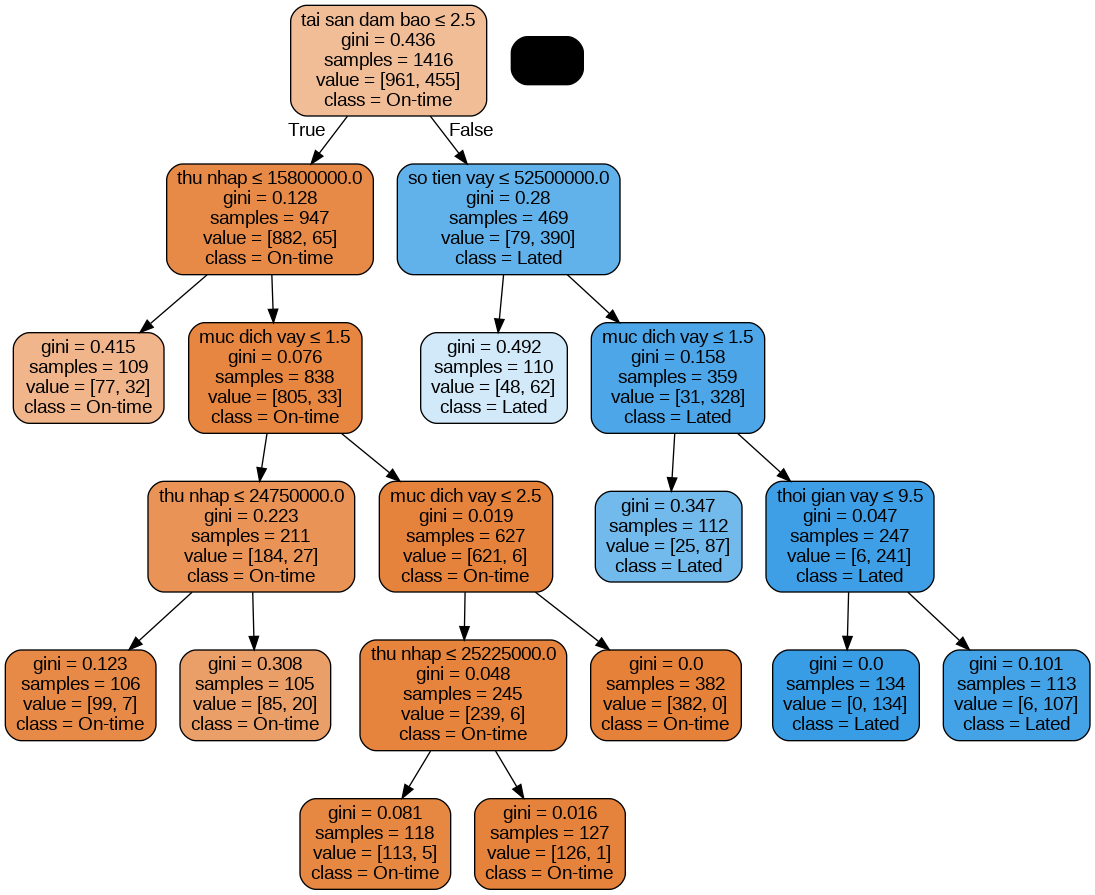

In [65]:
dot_data = StringIO()
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
clf.fit(X_plot_tree.values, y.ravel())
print('Note:Class 0 is on-time and class 1 is late payment')
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=features,
                class_names=['On-time','Lated'], 
                filled=True,
                rounded=True, 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### **Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

***a. Prediction***

Text(0.5, 19.049999999999997, 'Predicted label')

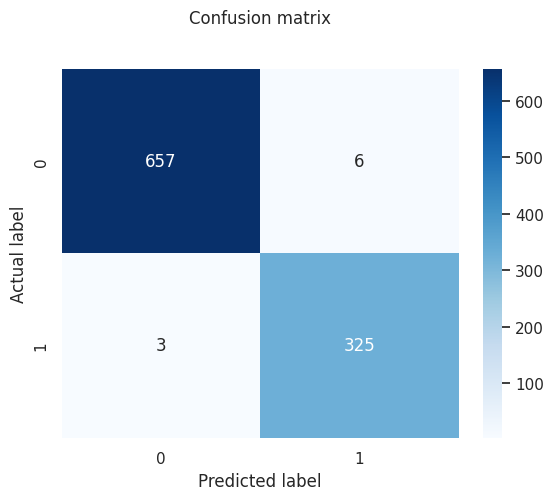

In [67]:
# Define model
RF_classifier = RandomForestClassifier()
# Fit model
RF_classifier.fit(X_train, y_train.ravel())
# get predicted y on train data
y_pred = RF_classifier.predict(X_train)
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
print('Classification report:')
print(classification_report(y_train,y_pred))
print('Random Forest accuracy: ', round(accuracy_score(y_train, y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       663
           1       0.98      0.99      0.99       328

    accuracy                           0.99       991
   macro avg       0.99      0.99      0.99       991
weighted avg       0.99      0.99      0.99       991

Random Forest accuracy:  0.9909


Text(0.5, 19.049999999999997, 'Predicted label')

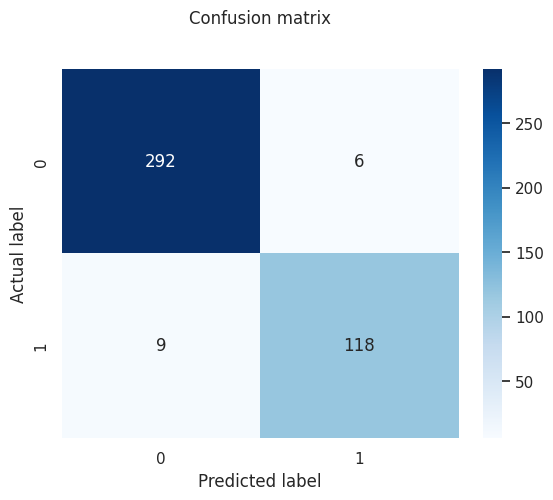

In [69]:
# get predicted y on test data
RF_y_pred = RF_classifier.predict(X_test)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,RF_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
print('Classification report:')
print(classification_report(y_test,RF_y_pred))
print('Random Forest accuracy: ', round(accuracy_score(y_test, RF_y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       298
           1       0.95      0.93      0.94       127

    accuracy                           0.96       425
   macro avg       0.96      0.95      0.96       425
weighted avg       0.96      0.96      0.96       425

Random Forest accuracy:  0.9647


***b. Feature Importance***

In [71]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 
                                        'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
0,tai san dam bao,0.495184
2,thu nhap,0.199898
1,so tien vay,0.141137
4,thoi gian vay,0.092830
3,muc dich vay,0.070951


<Axes: ylabel='FeatureName'>

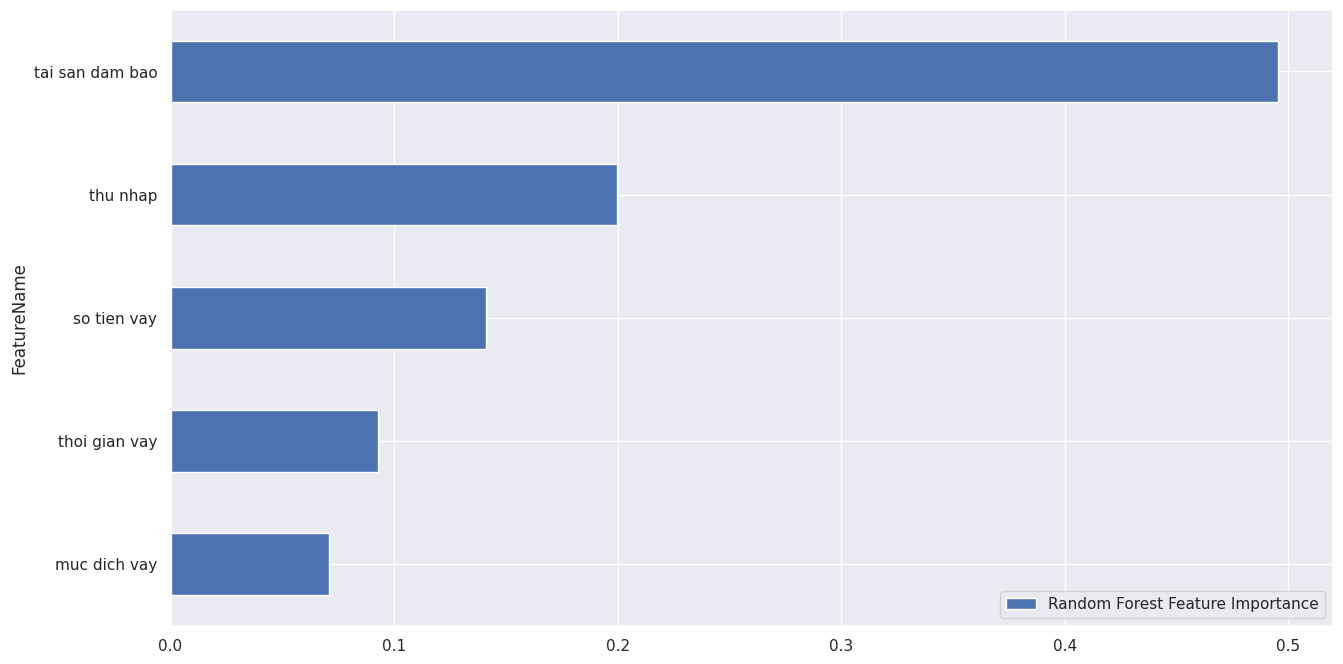

In [72]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), 
                                                                             x="FeatureName",
                                                                             y=["Random Forest Feature Importance"], 
                                                                             kind="barh")

***c. ROC Curve***

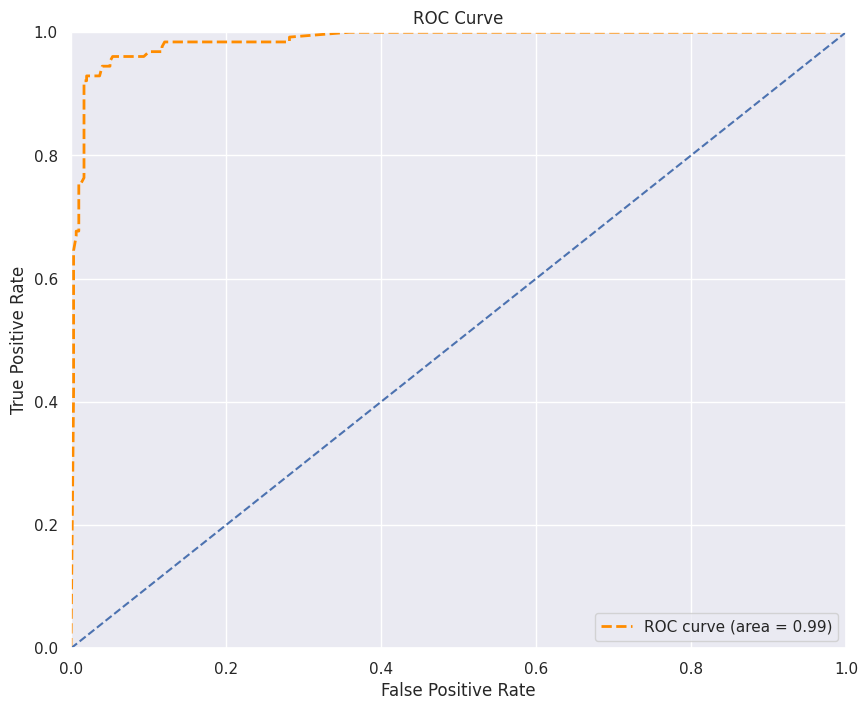

In [73]:
y_pred_prob_test_rf = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test_rf)
RF_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, RF_roc_auc)

#### **XGB**

In [74]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

***a. Prediction***

Text(0.5, 19.049999999999997, 'Predicted label')

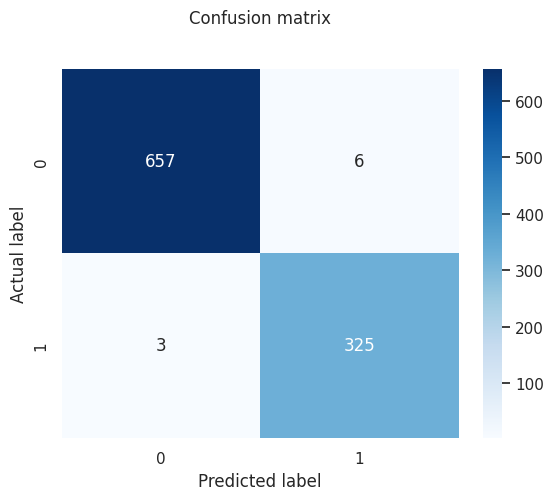

In [75]:
#Difine model
XGB_classifier = XGBClassifier()
# Fit model
XGB_classifier.fit(X_train, y_train.ravel())
# get predicted y on train data
y_pred = XGB_classifier.predict(X_train)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
print('Classification report:')
print(classification_report(y_train,y_pred))
print('XGBoost accuracy: ', round(accuracy_score(y_train, y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       663
           1       0.98      0.99      0.99       328

    accuracy                           0.99       991
   macro avg       0.99      0.99      0.99       991
weighted avg       0.99      0.99      0.99       991

XGBoost accuracy:  0.9909


Text(0.5, 19.049999999999997, 'Predicted label')

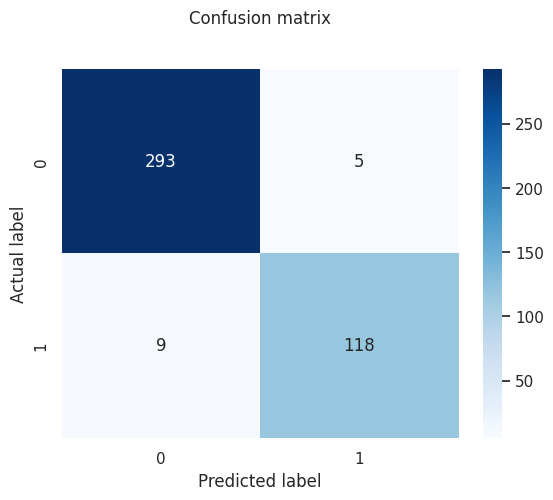

In [77]:
# get predicted y on test data
XGB_y_pred = XGB_classifier.predict(X_test)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,XGB_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
print('Classification report:')
print(classification_report(y_test,XGB_y_pred))
print('XGBoost accuracy: ', round(accuracy_score(y_test, XGB_y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       298
           1       0.96      0.93      0.94       127

    accuracy                           0.97       425
   macro avg       0.96      0.96      0.96       425
weighted avg       0.97      0.97      0.97       425

XGBoost accuracy:  0.9671


***b. Feature Importance***

In [79]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 
                                         'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

,FeatureName,XGBoost Feature Importance
0,tai san dam bao,0.753857
3,muc dich vay,0.087843
1,so tien vay,0.070553
2,thu nhap,0.050192
4,thoi gian vay,0.037555


<Axes: ylabel='FeatureName'>

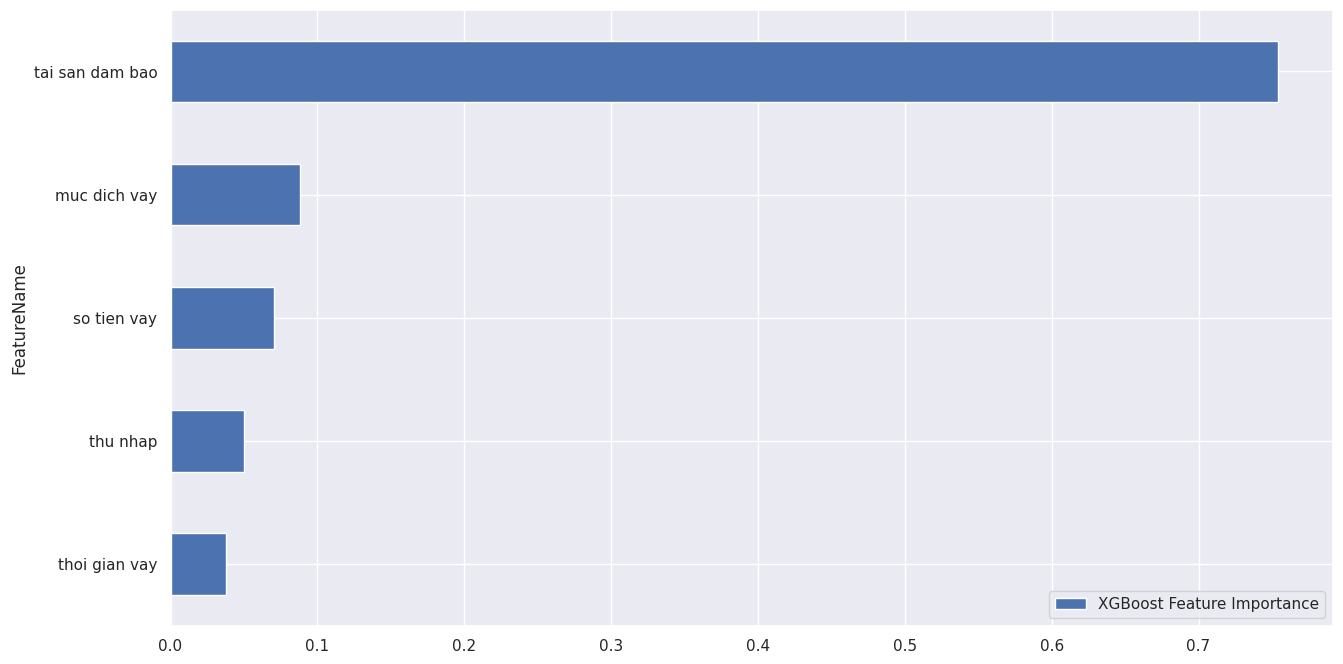

In [80]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

***c. ROC Curve***

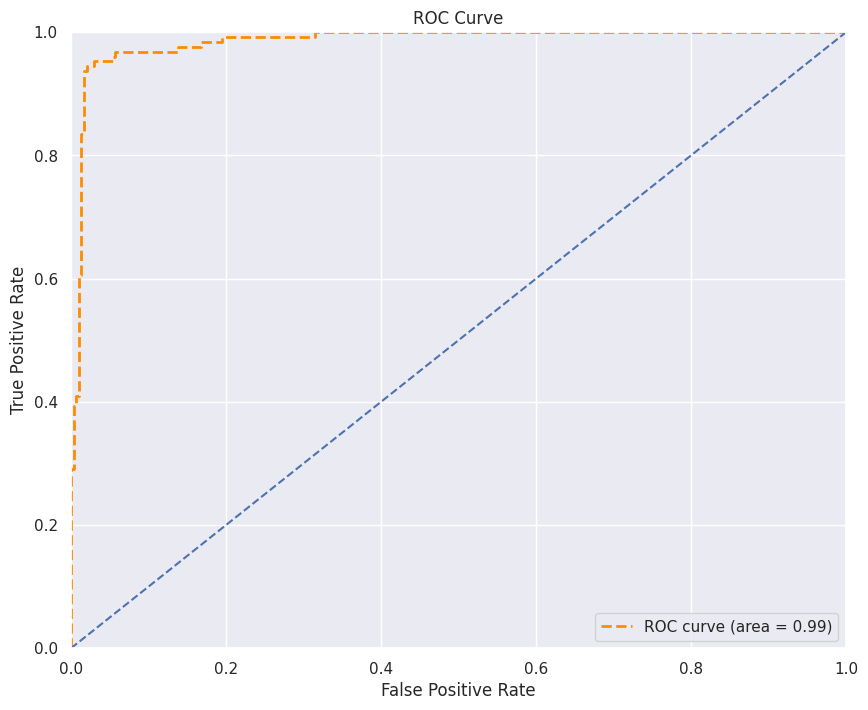

In [81]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
XGB_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, XGB_roc_auc)

#### **Ada Boost**

In [82]:
from sklearn.ensemble import AdaBoostClassifier

**a. Prediction**

Text(0.5, 19.049999999999997, 'Predicted label')

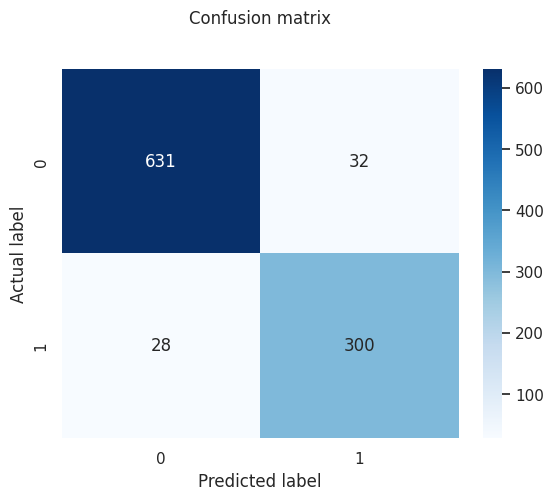

In [83]:
#Difine model
ada_classifier = AdaBoostClassifier()
#Fit model
ada_classifier.fit(X_train, y_train.ravel())

# get predicted y on train data
y_pred = ada_classifier.predict(X_train)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
print('Classification report:')
print(classification_report(y_train,y_pred))
print('Ada Boost accuracy: ', round(accuracy_score(y_train, y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       663
           1       0.90      0.91      0.91       328

    accuracy                           0.94       991
   macro avg       0.93      0.93      0.93       991
weighted avg       0.94      0.94      0.94       991

Ada Boost accuracy:  0.9395


Text(0.5, 19.049999999999997, 'Predicted label')

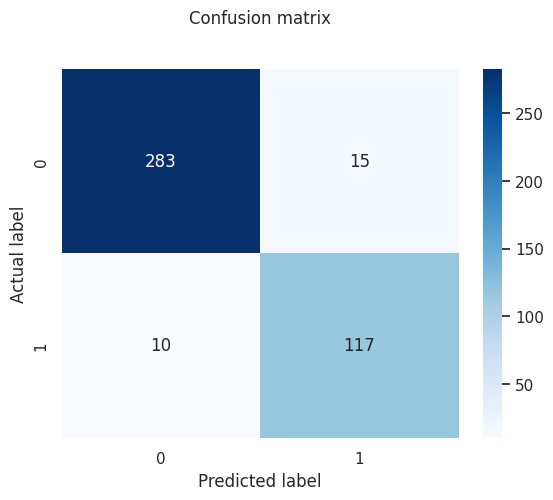

In [85]:
# get predicted y on test data
Ada_y_pred = ada_classifier.predict(X_test)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,Ada_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
print('Classification report:')
print(classification_report(y_test,Ada_y_pred))
print('Ada Boost accuracy: ', round(accuracy_score(y_test, Ada_y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       298
           1       0.89      0.92      0.90       127

    accuracy                           0.94       425
   macro avg       0.93      0.94      0.93       425
weighted avg       0.94      0.94      0.94       425

Ada Boost accuracy:  0.9412


***b. Feature Importance***

In [87]:
importance_ada = ada_classifier.feature_importances_
features_importances_ada = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 
                                         'AdaBoost Feature Importance': importance_ada})
features_importances_ada.sort_values(by=['AdaBoost Feature Importance'], ascending=False)

,FeatureName,AdaBoost Feature Importance
1,so tien vay,0.38
2,thu nhap,0.32
0,tai san dam bao,0.12
4,thoi gian vay,0.12
3,muc dich vay,0.06


<Axes: ylabel='FeatureName'>

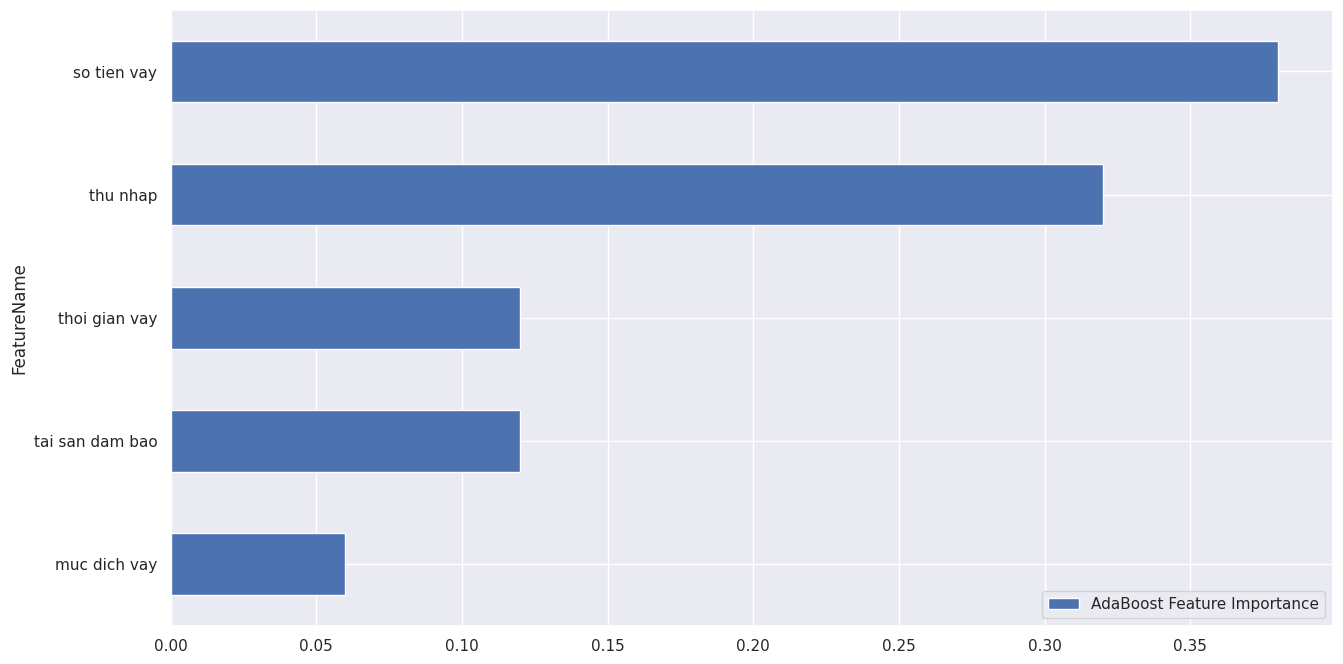

In [88]:
features_importances_ada.sort_values("AdaBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["AdaBoost Feature Importance"], kind="barh")

**c. ROC Curve**

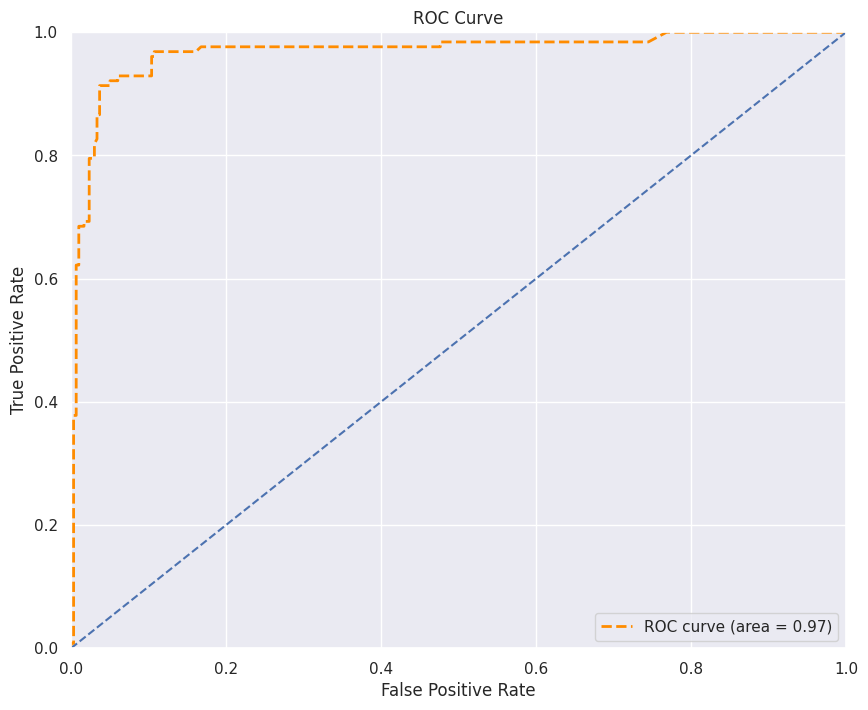

In [89]:
y_pred_prob_test = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
Ada_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, Ada_roc_auc)

#### **KNN**

In [90]:
from sklearn.neighbors import KNeighborsClassifier

**a. Prediction**

In [91]:
k_values = [i for i in range (1,15)]
scores = []
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

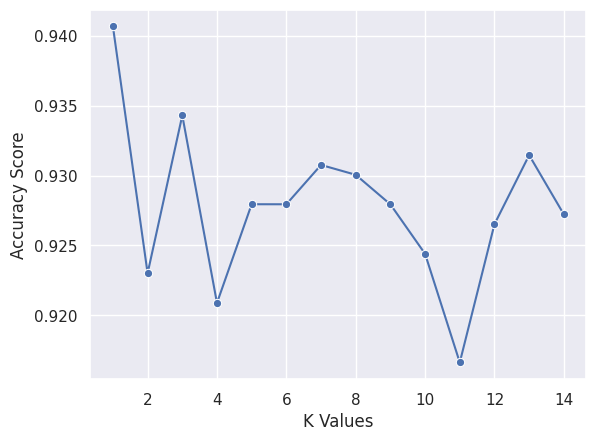

In [92]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

The best result is captured at k = 1 hence 1 is used for the final model

Text(0.5, 19.049999999999997, 'Predicted label')

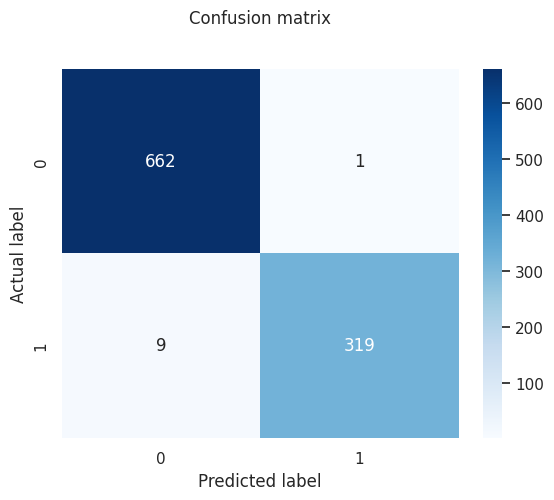

In [93]:
#Difine model
knn_classifier = KNeighborsClassifier(1)
#Fit model
knn_classifier.fit(X_train,y_train)
# get predicted y on train data
y_pred = knn_classifier.predict(X_train)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
print('Classification report:')
print(classification_report(y_train,y_pred))
print('KNN accuracy: ', round(accuracy_score(y_train, y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       663
           1       1.00      0.97      0.98       328

    accuracy                           0.99       991
   macro avg       0.99      0.99      0.99       991
weighted avg       0.99      0.99      0.99       991

KNN accuracy:  0.9899


Text(0.5, 19.049999999999997, 'Predicted label')

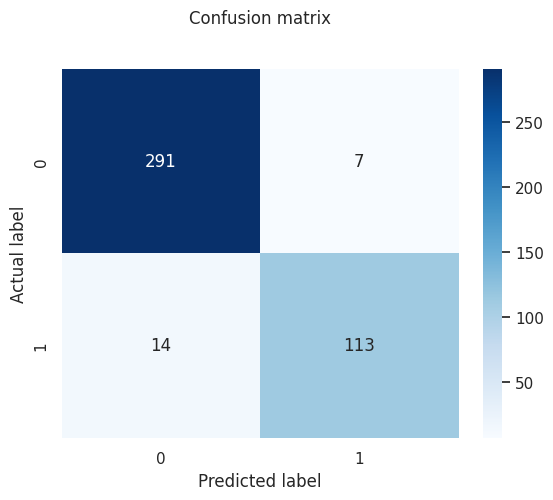

In [95]:
# get predicted y on test data
knn_y_pred = knn_classifier.predict(X_test)

p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,knn_y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [96]:
print('Classification report:')
print(classification_report(y_test,knn_y_pred))
print('KNN accuracy: ', round(accuracy_score(y_test, knn_y_pred),4))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       298
           1       0.94      0.89      0.91       127

    accuracy                           0.95       425
   macro avg       0.95      0.93      0.94       425
weighted avg       0.95      0.95      0.95       425

KNN accuracy:  0.9506


**b. ROC Curve**

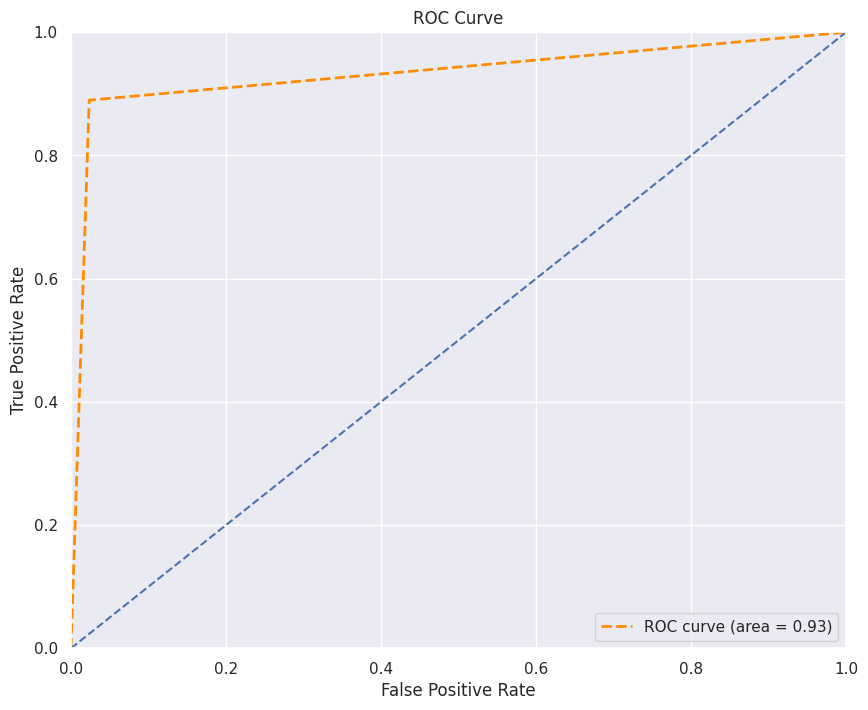

In [97]:
y_pred_prob_test = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
knn_roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, knn_roc_auc)

## **6. Compare models**

In [98]:
d={
'': ['Logistic Regression','Decision Tree','Random Forest','XGBoost','Ada Boost','KNN'],
'Accuracy': [LR_classifier.score(X_test, y_test), DT_classifier.score(X_test,y_test),RF_classifier.score(X_test, y_test),
             XGB_classifier.score(X_test,y_test),ada_classifier.score(X_test, y_test),knn_classifier.score(X_test, y_test)],
'Precision': [precision_score(y_test, LR_y_pred), precision_score(y_test, DT_y_pred),precision_score(y_test, RF_y_pred),
             precision_score(y_test, XGB_y_pred),precision_score(y_test, Ada_y_pred),precision_score(y_test, knn_y_pred)],
'Recall': [recall_score(y_test, LR_y_pred), recall_score(y_test, DT_y_pred),recall_score(y_test, RF_y_pred),
           recall_score(y_test, XGB_y_pred),recall_score(y_test, Ada_y_pred),recall_score(y_test, knn_y_pred)],
'F1': [f1_score(y_test, LR_y_pred), f1_score(y_test, DT_y_pred),f1_score(y_test, RF_y_pred),
       f1_score(y_test, XGB_y_pred),f1_score(y_test, Ada_y_pred),f1_score(y_test, knn_y_pred)],
'ROC AUC': [LR_roc_auc, DT_roc_auc, RF_roc_auc, XGB_roc_auc, Ada_roc_auc, knn_roc_auc]
}

results=pd.DataFrame(data=d).round(4).set_index('')
results

,Accuracy,Precision,Recall,F1,ROC AUC
,,,,,
Logistic Regression,0.9153,0.8699,0.8425,0.8560,0.9484
Decision Tree,0.9459,0.9333,0.8819,0.9069,0.9416
Random Forest,0.9647,0.9516,0.9291,0.9402,0.9859
XGBoost,0.9671,0.9593,0.9291,0.9440,0.9851
Ada Boost,0.9412,0.8864,0.9213,0.9035,0.9680
KNN,0.9506,0.9417,0.8898,0.9150,0.9331


<Figure size 1500x800 with 0 Axes>

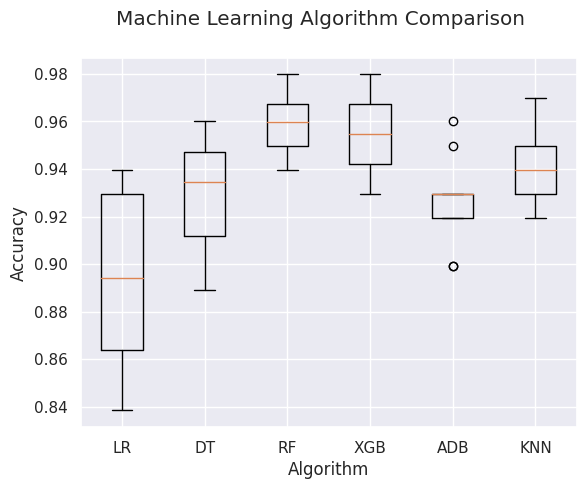

In [99]:
# Define the models to evaluate
models = [
    ('LR', LogisticRegression()),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('ADB',AdaBoostClassifier()),
    ('KNN', KNeighborsClassifier()),
]

# Evaluate each model on the test set using 10-fold cross-validation and store the results
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

# Generate a boxplot comparing the model performance
plt.figure(figsize = (15,8))
fig = plt.figure()
fig.suptitle('Machine Learning Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

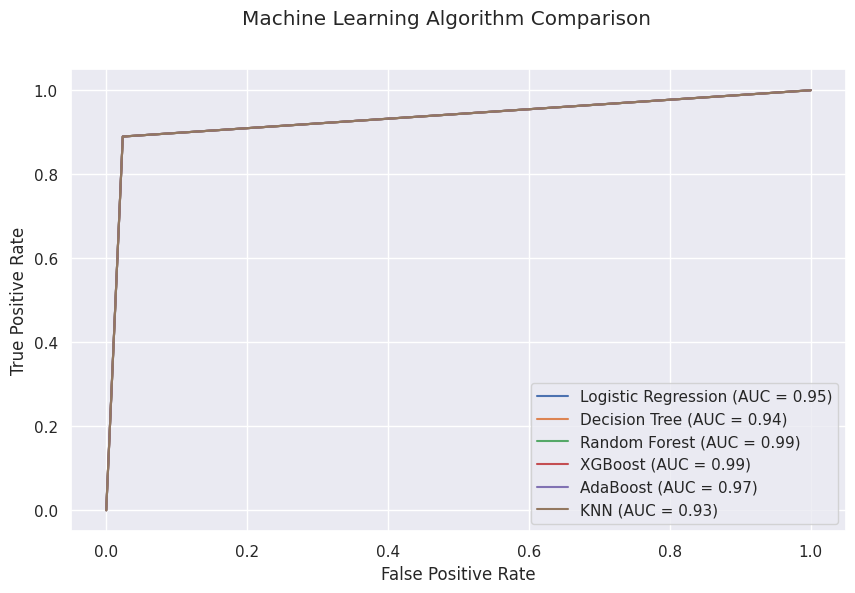

In [100]:
def _plot_roc_curve(fpr, tpr, thres, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Machine Learning Algorithm Comparison')

# Plot ROC curves
_plot_roc_curve(fpr, tpr, thres, LR_roc_auc, 'Logistic Regression')
_plot_roc_curve(fpr, tpr, thres, DT_roc_auc, 'Decision Tree')
_plot_roc_curve(fpr, tpr, thres, RF_roc_auc, 'Random Forest')
_plot_roc_curve(fpr, tpr, thres, XGB_roc_auc, 'XGBoost')
_plot_roc_curve(fpr, tpr, thres, Ada_roc_auc, 'AdaBoost')
_plot_roc_curve(fpr, tpr, thres, knn_roc_auc, 'KNN')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()

## **7. Predict new customer**

In [101]:
#import new data
new_data = pd.read_excel('/content/drive/MyDrive/HỌC TẬP/NĂM 3/HK2/mô hình rủi ro tín dụng/ck/New data.xlsx')
new_data.head()

,id,gioi tinh,thu nhap,tien dien/ thang,so tien vay,muc dich vay,gia dinh,so nam lam viec,tuoi,thoi gian vay,trinh do hoc van,tai san dam bao
0,1,0,23500000,1050000,455000000,2,1,12,34,24,2,1
1,2,0,16500000,955000,250000000,3,1,9,41,19,3,1
2,3,1,13800000,580000,100000000,1,3,8,29,12,4,3
3,4,0,18500000,1100000,250000000,4,1,10,36,18,2,1
4,5,1,20100000,690000,160000000,3,2,5,28,15,2,2


In [102]:
features = ['tai san dam bao', 'so tien vay', 'thu nhap', 'muc dich vay',
       'thoi gian vay']
X_new = new_data[features].values

#standardize the input data
std_data = scaler.transform(X_new)

In [103]:
prediction = XGB_classifier.predict(std_data)

results = pd.DataFrame({'Prediction': prediction})
results['Note'] = results['Prediction'].apply(lambda x: 'Will pay on-time' if x == 0 else 'Will pay late')

print(results)

    Prediction              Note
0            0  Will pay on-time
1            0  Will pay on-time
2            1     Will pay late
3            0  Will pay on-time
4            0  Will pay on-time
5            1     Will pay late
6            0  Will pay on-time
7            1     Will pay late
8            0  Will pay on-time
9            1     Will pay late
10           1     Will pay late
11           0  Will pay on-time
12           1     Will pay late
13           0  Will pay on-time
14           1     Will pay late
